### KNN

In [1]:
# 필요한 패키지 설치
!pip install mglearn
import mglearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd

     -------------------------------------- 581.4/581.4 kB 1.6 MB/s eta 0:00:00


In [2]:
# 데이터 불러오기
# https://www.kaggle.com/datasets/muratkokludataset/raisin-dataset
df = pd.read_excel("C:/Users/qorud/OneDrive/바탕 화면/Github/Data Analysis Method/Raisin_Dataset.xlsx")

# 데이터 샘플 확인
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [3]:
# 독립변수와 종속변수 분리하여 생성
x = df.drop(['Area','Class'], axis='columns')
y = df[['Class']]

# 독립변수 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(x)

# 컬럼명 결합
x = pd.DataFrame(data=df_minmax, columns=x.columns)

# 학습셋, 테스트셋 분리 (6:4)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6, test_size=0.4)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  540
test data 개수:  360


#### KNN 모델은 거리 기반으로 분류를 하므로 독립변수의 스케일을 정규화해 준다. 그리고 6:4의 비율로 학습셋과 테스트 셋을 분리해준다. 아웃풋 결과에서 학습셋은 540개 테스트셋은 360개의 관측치가 배분됐다

In [4]:
# 기본 K-nn 모델 생성 및 적용

classifier = KNeighborsClassifier(n_neighbors = 3, 
                                  weights='uniform', 
                                  metric="minkowski")
classifier.fit(x_train, y_train)

# K-nn 모델 정확도 출력
print(classifier.score(x_train, y_train))
print(classifier.score(x_test, y_test))

0.912962962962963
0.8111111111111111


C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

#### 기본적인 설정으로 KNN 모델을 생성하여 학습셋과 테스트셋의 정확도를 확인한다. n_neighbors 옵션은 3으로 하여 이웃한 3개의 관측치를 기반으로 분류를 한다. 그리고 weights='uniform'은 이웃한 관측치와의 거리에 가중치를 주지 않는 옵션이다. metric은 거리 측정 방식 옵션으로 기본값은 민코프스키 측정 방식이다. 유클리드, 마할라노비스 등의 거리 측정 방식을 사용할 수 있다.

C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode

C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

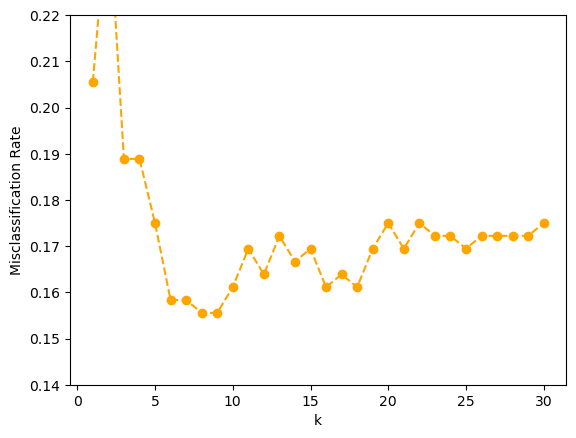

In [5]:
# 이웃 k 수 1 ~ 30까지 엘보우차트 시각화 (거리 가중치 미적용)

# k 수 범위 지정
k_num = range(1,31)

accuracies = []
for k in k_num:
    k_num_model_1 = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    k_num_model_1.fit(x_train, y_train)
    accuracies.append(1 - k_num_model_1.score(x_test, y_test))

# 그래프 옵션 설정
plt.plot(k_num, accuracies, 'o--', color = 'orange')
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.ylim(0.14, 0.22)
plt.show()

#### 거리 가중치를 적용하지 않은 모델에서 k 이웃 수를 1에서 30까지 늘려가며 KNN 모델의 오분류율을 시각화했다. 이웃 수가 5개가 되면서부터 오분류율이 15%대로 낮아지고 안정되는 모습을 보인다. 하지만 이웃을 과도하게 늘리는 것은 연산량을 증가시키며 과적합을 유도할 수 있으므로 k를 6개 정도로 설정하는 것이 적합할 것으로 보인다.

C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

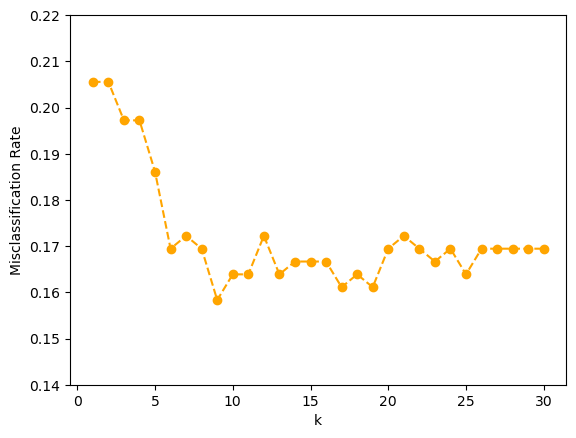

In [6]:
# 이웃 k 수 1 ~ 30까지 엘보우차트 시각화 (거리 가중치 적용)

# k 수 범위 지정
k_num = range(1,31)

accuracies = []
for k in k_num:
  k_num_model_2 = KNeighborsClassifier(n_neighbors = k, weights='distance')
  k_num_model_2.fit(x_train, y_train)
  accuracies.append(1 - k_num_model_2.score(x_test, y_test))

# 그래프 옵션 설정
plt.plot(k_num, accuracies, 'o--', color = 'orange')
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.ylim(0.14, 0.22)
plt.show()

#### 다음으로 거리 가중치를 적용한 모델로 k 이웃 수를 1에서 30까지 늘려가며 KNN 모델의 오분류율을 시각화했다. 앞의 거리 가중치 미적용 버전보다 전체적으로 오분류율이 감소했으며 변동성도 줄어든 것을 알 수 있다.

C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\qorud\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sam

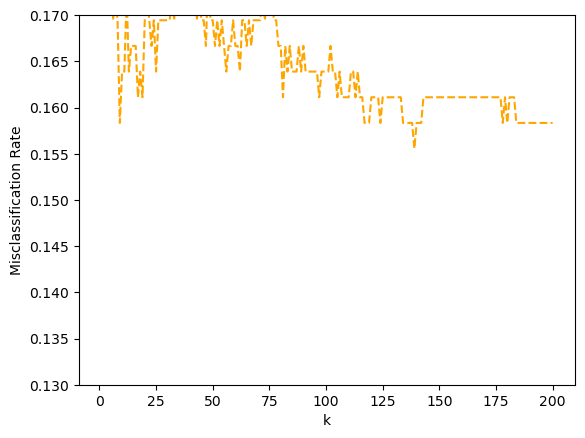

In [7]:
# 이웃 k 수 1 ~ 200까지 엘보우차트 시각화 (거리 가중치 적용)

# k 수 범위 지정
k_num = range(1,201)

accuracies = []
for k in k_num:
    k_num_model_2 = KNeighborsClassifier(n_neighbors = k, weights='distance')
    k_num_model_2.fit(x_train, y_train)
    accuracies.append(1 - k_num_model_2.score(x_test, y_test))

# 그래프 옵션 설정
plt.plot(k_num, accuracies, '--', color = 'orange')
plt.xlabel("k")
plt.ylabel("Misclassification Rate")
plt.ylim(0.13, 0.17)
plt.show()

#### 앞에서 이웃 k를 30까지 늘릴수록 오분류율이 감소했다. 그렇다면 이웃수가 늘어날수록 오분류율이 감소할까? 이번에는 k를 200까지 증가시켜 시각화 했다. 50개 지점부터 오분류율이 증가하는 것을 확인할 수 있다. 이처럼 KNN은 적정한 이웃 수를 찾아내는 것이 중요하다.

In [8]:
# 시각화를 위한 차원 축소

# 주성분 개수 설정(2개 설정)
pca = PCA(n_components=2) 
df_pca = pca.fit_transform(x_test)

# 주성분으로 변형된 테이블 생성
df_pca = pd.DataFrame(data=df_pca, columns = ['C1','C2'])

df_pca.head()

,C1,C2
0,0.369534,0.055635
1,0.179902,-0.122621
2,-0.086574,0.137702
3,-0.347059,0.106732
4,-0.556534,0.287719


#### 이웃 k 수에 따라 KNN 모델의 결정경계선이 어떻게 변화하는지 시각화하여 확인하기 위해 PCA를 사용하여 독립변수를 두 개의 차원으로 축소했다.

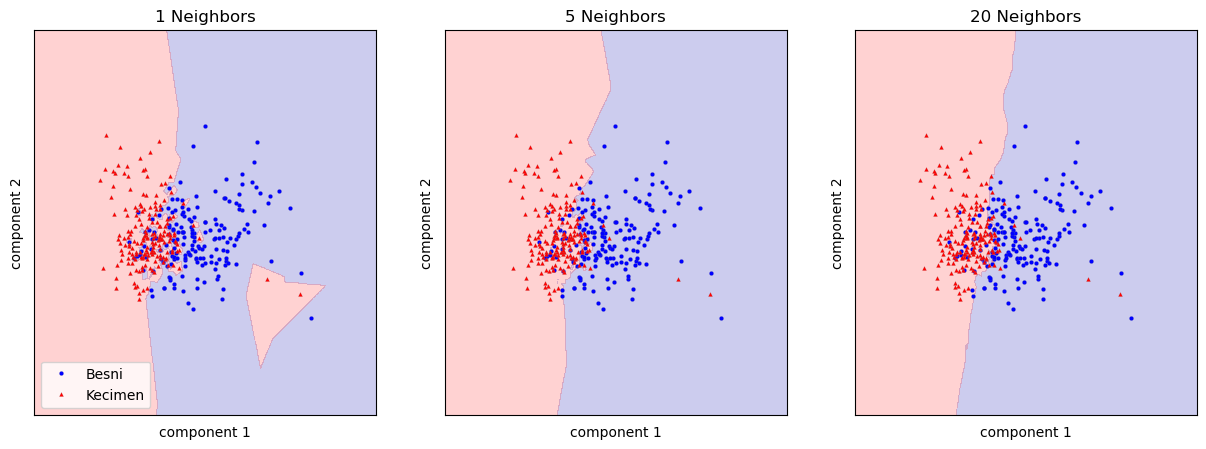

In [9]:
# 결정 경계선(decision boundary) 시각화 확인

# 독립변수, 종속변수 전처리
df_vsl_x = df_pca.to_numpy()
df_vsl_y = y_test['Class'].to_numpy()

# 그래프 설정
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# 이웃 수 1, 5, 20에 따른 결정곙계 시각화
for n_neighbors, ax in zip([1, 5, 20], axes):
    k_num_model_eg = KNeighborsClassifier(
        n_neighbors=n_neighbors).fit(df_vsl_x, df_vsl_y)
    mglearn.plots.plot_2d_separator(k_num_model_eg, df_vsl_x, 
                                    fill=True, eps=0.5, ax=ax, alpha=.2)
    mglearn.discrete_scatter(df_vsl_x[:, 0], df_vsl_x[:, 1], 
                             df_vsl_y, markeredgewidth=0.1, 
                             c=['b','r'], s=3, ax=ax)
    ax.set_xlabel("component 1")
    ax.set_ylabel("component 2")
    ax.set_title("{} Neighbors".format(n_neighbors))
axes[0].legend(loc=3)

#### PCA를 적용한 2개의 변수로 이웃 수를 1,5,20으로 바꿔가며 결정경계선이 어떻게 달라지는지 확인한다. 이웃 수가 1개일 때는 결정경계선의 굴곡이 세세하게 나타나지만 20개일 때는 단순한 형태를 띠고 있다 이웃 수가 적정하게 늘어나면 학습셋의 디테일한 분류는 힘들어지지만 범용적인 모델이 되어 테스트셋의 정확도를 높여주는 것이다.